In [1]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

# 고객의 전체모습을 파악하는 테크닉 10

# 전제조건

## 스포츠 센터의 데이터를 다룰 예정

### 3종류의 회원들
* 센터를 언제든 사용할 수 있는 종일 회원
* 낮에만 사용할 수 있는 주간 회원
* 밤에만 사용할 수 있는 야간 회원

### 데이터 정보
* use_log.csv 센터의 이용 이력 데이터. 기간은 2018년 4월 ~ 2019년 3월
* customer_master.csv 2019년 3월 말 시점의 회원데이터
* class_master.csv 회원 구분 데이터(종일, 주간, 야간)
* capaign_master.csv 행사 구분 데이터(입회비 유무 등)

### 테크닉1 : 데이터를 읽어들이고 확인하자

#### 처음에는 처음 몇 행을 표시해서 어떤 데이터열이 존재하는지, 각 데이터의 관계성 같은 데이터의 큰 틀을 파악하는 것이 중요합니다.
#### 데이터의 개수를 파악하기 위해서 len()을 사용해서 표시했습니다.

In [2]:
import pandas as pd
uselog = pd.read_csv('data/use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
customer = pd.read_csv('data/customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [4]:
class_master = pd.read_csv('data/class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [5]:
campaign_master = pd.read_csv('data/campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


### 테크닉2 : 고객 데이터를 가공하자

#### 앞의 customer에 회원 구분 class_master와 캠페인 구분 campaign_master를 결합해서 customer_join을 새로 생성합니다.
#### 고객 데이터를 중심으로 가로로 결합하는 레프트 조인입니다.

In [6]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [7]:
print(len(customer))
print(len(customer_join))

4192
4192


#### class_name, price, campaign_name 칼럼이 추가되었고, 데이터 개수도 조인 전후로 변화가 없는 것을 확인할 수 있습니다.

#### 조인 할 때 키가 없거나 조인이 잘못되면 자동으로 결측치가 들어갑니다. 그래서 조인 후에는 결측치를 확인해야 합니다.

In [8]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

#### end_date에 결측이 있는 이유는 탈퇴하지 않은 회원의 탈퇴일이 공백이기 때문이라고 생각합니다.

### 테크닉3 : 고객데이터를 집계 해보자

#### 어떤 회원과 어떤 캠페인이 많은지, 언제 입회, 탈퇴가 많은지, 남녀 비율은 얼마인지, 탈퇴할 때까지의 기간은 어느 정도인지 등 많은 것을 집계할 수 있습니다.

In [9]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [10]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [11]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [12]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

#### groupby를 이용해서 집계합니다.

#### 위에서 보면 주간반이 거의 절반을 차지하고, 야간 다음 주간 순입니다.

#### 캠페인은 일반 입회가 많고, 입회 캠페인에 의한 가입이 약 20%입니다.

#### 남녀 비율은 남자(M) 쪽이 많다는 것을 알 수 있습니다.

#### 마지막으로 2019년 3월 현재 가입된 회원은 2842명이고 탈퇴한 유저는 1350명인 걸 알 수 있습니다.

### 테크닉4 : 최근 고객데이터를 집계해보자

#### 가장 최근 월의 고객만 추출

#### 2가지 방법
#### 1. 2019년 3월(2019년 3월 31일)에 탈퇴한 고객과 재적 중인 고객을 추출
#### 2. is_deleted 열로 추출하는 방법

#### 이 데이터의 경우 1번의 방법을 사용합니다.

In [13]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [14]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [15]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [16]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

#### 캠페인의 경우에만 변화가 발생했습니다

### 테크닉5 : 이용이력 데이터를 집계하자

In [17]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


#### usedate 경우, log_id로 파악할 수 있기에 생략합니다.

In [18]:
# 숫자형 데이터만 선택한 후 그룹화 및 집계
uselog_customer = uselog_months.groupby("customer_id")["count"].agg(["mean", "median", "max", "min"])

# 인덱스를 초기화하여 고객 ID를 열로 변환
uselog_customer = uselog_customer.reset_index(drop=False)

# 결과 확인
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


#### 고객별로 통계값 역시 파악합니다.

### 테크닉6 : 이용이력 데이터로부터 정기이용 여부  플래그를 작성하자

In [19]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","연월","weekday"], 
                                as_index=False).count()[["customer_id","연월", "weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


#### AS002855의 경우 2018년 4월 토요일에 4번 / 2018년 5월 토요일에 4번 인거 보고 토요일에 사람이 오늘 날로 생각합니다.

In [20]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


#### 플래그를 작성하는데 횟수가 4미만이면 0이고 4이상이면 1을 대입합니다. 즉 카운터가 4이상이면 1로 넣습니다

### 테크닉7 : 고객 데이터와 이용이력데이터를 결합하자

In [21]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [22]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

#### 앞에 있는 컬럼들을 모두 합치고 결측치를 확인합니다. 

### 테크닉8 : 회원기간을 계산하자

In [23]:
customer_join["calc_date"] = pd.to_datetime(customer_join["end_date"])
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])

In [24]:
from dateutil.relativedelta import relativedelta #날짜를 비교해주는 함수
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0 #멤버쉽 period라는 컬럼 만들기
for i in range(len(customer_join)): #날짜비교함수를 통해 멤버쉽 period에 값을 채워넣기
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


#### 회원기간은 start_date와 end_date로 이루어져 있으며 탈퇴하지 않은 회원은 결측치 NaT로 되어있기 때문에 이 값을 2019년 4월 30일(이 시기는 미래의 시점)으로 대입합니다.

### 테크닉9 : 고객행동의 각종통계량을 파악하자

In [25]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


#### 컬럼의 mean은 고객의 매월 평균 이용 횟수, 행의 mean은 고객의 매월 평균 이용 횟수의 평균입니다. 즉 고객 한명당 이용 횟수는 약 5번인 것을 알 수 있습니다.

In [26]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

#### 0보다 1이 크기 때문에, 정기적으로 이용하는 회원의 수가 많다는 것을 알 수 있다. 

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

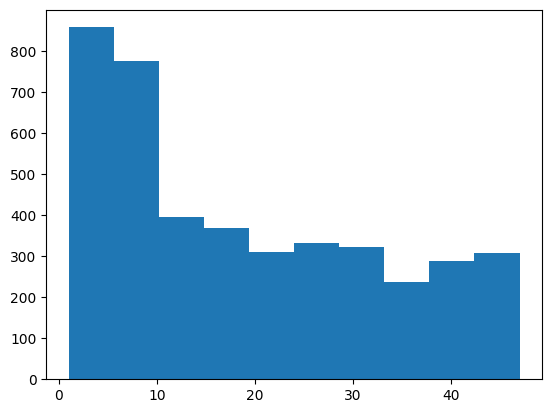

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

#### 그래프를 통해서 회원 기간의 분포를 보고 분석해 봅시다.10개월 이내의 고객이 많고 나머지는 일정하다는 정보를 통해서 이것은 짧은 기간에 고객이 빠져나가는 업계라는 것을 사사합니다.

### 테크닉10 : 탈퇴회원과 지속회원의 차이를 파악하자

#### 테크닉 3에서 탈퇴 회원은 1,350명, 지속 회원은 2,840명이였는데 아래에서 각 통계량을 비교해 보겠습니다.

In [28]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership_period
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,2018-10-17 16:23:28,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,2018-06-30 00:00:00,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,2018-10-31 00:00:00,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,2019-01-31 00:00:00,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,2019-03-31 00:00:00,23.000000
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,NaN,5.033692


In [29]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership_period
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842,2842.000000
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,2019-04-30 00:00:00,23.970443
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,2019-04-30 00:00:00,1.000000
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,2019-04-30 00:00:00,12.000000
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,2019-04-30 00:00:00,24.000000
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,2019-04-30 00:00:00,35.000000
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,NaN,13.746761


In [30]:
customer_join.to_csv("customer_join.csv", index=False)